<a href="https://colab.research.google.com/github/UtkarshRaj130/Advanced_Soybean_Agricultural_Dataset_Analysis/blob/main/Code_Notebooks/Classification/07_Classification_K_medoids_Sunny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget https://raw.githubusercontent.com/UtkarshRaj130/Advanced_Soybean_Agricultural_Dataset_Analysis/refs/heads/main/Dataset/2_clusters_only_on_output.csv

--2025-04-14 10:42:51--  https://raw.githubusercontent.com/UtkarshRaj130/Advanced_Soybean_Agricultural_Dataset_Analysis/refs/heads/main/Dataset/2_clusters_only_on_output.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5557 (5.4K) [text/plain]
Saving to: ‘2_clusters_only_on_output.csv’

2_clusters_only_on_ 100%[===================>]   5.43K  --.-KB/s    in 0s      

2025-04-14 10:42:51 (54.5 MB/s) - ‘2_clusters_only_on_output.csv’ saved [5557/5557]



In [3]:
!wget https://raw.githubusercontent.com/UtkarshRaj130/Advanced_Soybean_Agricultural_Dataset_Analysis/refs/heads/main/Dataset/3_one_hot_encoded.csv

--2025-04-14 10:42:51--  https://raw.githubusercontent.com/UtkarshRaj130/Advanced_Soybean_Agricultural_Dataset_Analysis/refs/heads/main/Dataset/3_one_hot_encoded.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13442 (13K) [text/plain]
Saving to: ‘3_one_hot_encoded.csv’

3_one_hot_encoded.c 100%[===================>]  13.13K  --.-KB/s    in 0s      

2025-04-14 10:42:51 (61.2 MB/s) - ‘3_one_hot_encoded.csv’ saved [13442/13442]



In [4]:
!wget https://raw.githubusercontent.com/UtkarshRaj130/Advanced_Soybean_Agricultural_Dataset_Analysis/refs/heads/main/Dataset/Optimal_Clusters_datasets/labeled_clusters_KMedoids_k_2_sel.csv

--2025-04-14 10:42:52--  https://raw.githubusercontent.com/UtkarshRaj130/Advanced_Soybean_Agricultural_Dataset_Analysis/refs/heads/main/Dataset/Optimal_Clusters_datasets/labeled_clusters_KMedoids_k_2_sel.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4499 (4.4K) [text/plain]
Saving to: ‘labeled_clusters_KMedoids_k_2_sel.csv’

labeled_clusters_KM 100%[===================>]   4.39K  --.-KB/s    in 0s      

2025-04-14 10:42:53 (44.9 MB/s) - ‘labeled_clusters_KMedoids_k_2_sel.csv’ saved [4499/4499]



In [5]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.feature_selection import mutual_info_regression

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score
from sklearn.model_selection import ParameterGrid

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.model_selection import train_test_split

# Data
This dataset contains the classes obtained upon binary clustering of selected parameters from previous steps

In [6]:
data=pd.read_csv('2_clusters_only_on_output.csv')

In [7]:
data

,Sugars (Su),Weight of 300 Seeds (W3S),Seed Yield per Unit Area (SYUA),Number of Seeds per Pod (NSP),Protein Percentage (PPE),Protein Content (PCO),Cluster,Cluster Label
0,0.433,33.6,5567.4,1.86,33.2,0.82,1,Poor Production
1,0.334,34.4,2245.5,1.87,38.5,0.13,1,Poor Production
2,0.490,35.2,4326.7,2.04,33.6,0.15,1,Poor Production
3,0.163,52.3,6214.5,2.20,33.5,0.14,0,Good Production
4,0.795,31.2,3897.8,1.88,39.6,0.60,1,Poor Production
...,...,...,...,...,...,...,...,...
103,0.663,31.2,4472.7,2.60,39.7,0.32,0,Good Production
104,0.165,34.5,5643.7,2.60,33.6,0.36,0,Good Production
105,1.115,37.2,3067.1,1.80,37.2,1.15,1,Poor Production
106,0.295,35.3,3112.2,2.10,32.3,0.17,1,Poor Production


In [8]:
data_original=pd.read_csv('3_one_hot_encoded.csv')

In [9]:
data_original

,Parameters,Random,Plant Height (PH),Number of Pods (NP),Biological Weight (BW),Sugars (Su),Relative Water Content in Leaves (RWCL),ChlorophyllA663,Chlorophyllb649,Protein Percentage (PPE),...,Number of Seeds per Pod (NSP),Protein Content (PCO),C_2,S_2,S_3,G_2,G_3,G_4,G_5,G_6
0,C1S1G5,R1,50.5,130.3,111,0.433,0.732,1.4,3.1,33.2,...,1.86,0.82,False,False,False,False,False,False,True,False
1,C2S3G4,R1,44.5,132.0,80,0.334,0.674,7.1,2.2,38.5,...,1.87,0.13,True,False,True,False,False,True,False,False
2,C2S1G6,R1,52.2,150.0,83,0.490,0.677,1.8,1.3,33.6,...,2.04,0.15,True,False,False,False,False,False,False,True
3,C1S1G1,R1,50.5,140.8,66,0.163,0.745,1.1,3.0,33.5,...,2.20,0.14,False,False,False,False,False,False,False,False
4,C1S2G6,R2,49.2,175.6,73,0.795,0.725,7.5,2.1,39.6,...,1.88,0.60,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,C1S2G3,R3,44.0,209.0,132,0.663,0.875,9.0,1.3,39.7,...,2.60,0.32,False,True,False,False,True,False,False,False
104,C1S3G2,R2,53.3,160.0,130,0.165,0.651,1.8,3.2,33.6,...,2.60,0.36,False,False,True,True,False,False,False,False
105,C2S1G5,R2,50.2,148.3,151,1.115,0.683,6.1,1.2,37.2,...,1.80,1.15,True,False,False,False,False,False,True,False
106,C2S2G4,R1,52.2,156.0,66,0.295,0.632,6.9,1.1,32.3,...,2.10,0.17,True,True,False,False,False,True,False,False


# **Random Forest Algorithm**

In [45]:
hyper_parameters={
    'n_estimators':[20,50,100],
    'criterion':['gini','entropy'],
    'max_depth':[3,5,7],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}
randomForest=RandomForestClassifier()

In [46]:
def GridSearch_BestModel(model,hyper_parameters):
  grid_search=GridSearchCV(model,hyper_parameters,cv=5,scoring='accuracy',n_jobs=-1)
  grid_search.fit(data_X_train,data_Y_train)
  best_model=grid_search.best_estimator_
  print(grid_search.best_params_)
  return best_model

In [47]:
best_randomForest=GridSearch_BestModel(randomForest,hyper_parameters)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 20}


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 20}

In [48]:
def evaluate_model(model,data_X_valid,data_Y_valid,data_X_test,data_Y_test):
  evaluation={'Accuracy':[],'Precision':[],'Recall':[],'F1 Score':[]}
  predicted_valid=model.predict(data_X_valid)
  predicted_test=model.predict(data_X_test)

  print('Accuracy Score')
  print('Validation Set:',accuracy_score(data_Y_valid,predicted_valid))
  print('Test Set:',accuracy_score(data_Y_test,predicted_test))

  print('\nPrecision Score')
  print('Validation Set: ',precision_score(data_Y_valid,predicted_valid))
  print('Test Set: ',precision_score(data_Y_test,predicted_test))

  print('\nRecall Score')
  print('Validation Set: ',recall_score(data_Y_valid,predicted_valid))
  print('Test Set: ',recall_score(data_Y_test,predicted_test))

  print('\nF1 Score')
  print('Validation Set: ',f1_score(data_Y_valid,predicted_valid))
  print('Test Set: ',f1_score(data_Y_test,predicted_test))

  evaluation['Accuracy'].append(accuracy_score(data_Y_valid,predicted_valid))
  evaluation['Accuracy'].append(accuracy_score(data_Y_test,predicted_test))
  evaluation['Precision'].append(precision_score(data_Y_valid,predicted_valid))
  evaluation['Precision'].append(precision_score(data_Y_test,predicted_test))
  evaluation['Recall'].append(recall_score(data_Y_valid,predicted_valid))
  evaluation['Recall'].append(recall_score(data_Y_test,predicted_test))
  evaluation['F1 Score'].append(f1_score(data_Y_valid,predicted_valid))
  evaluation['F1 Score'].append(f1_score(data_Y_test,predicted_test))

  print("Confusion Matrix")
  print("\nValidation Set\n")
  print(confusion_matrix(data_Y_valid,predicted_valid))
  print("\nTest Set\n")
  print(confusion_matrix(data_Y_test,predicted_test))

  return pd.DataFrame(evaluation,index=['Validation Set','Testing Set'])


****

**for kmediod clusters(2)**

*only using input parameters*

In [22]:
data=pd.read_csv('labeled_clusters_KMedoids_k_2_sel.csv')
data.head()

,Prod_Label_KMedoids_k=2_sel,Sugars (Su),Weight of 300 Seeds (W3S),Seed Yield per Unit Area (SYUA),Number of Seeds per Pod (NSP),Protein Percentage (PPE),Protein Content (PCO),Number of Pods (NP)
0,0,0.433,33.6,5567.4,1.86,33.2,0.82,130.3
1,1,0.334,34.4,2245.5,1.87,38.5,0.13,132.0
2,0,0.490,35.2,4326.7,2.04,33.6,0.15,150.0
3,1,0.163,52.3,6214.5,2.20,33.5,0.14,140.8
4,1,0.795,31.2,3897.8,1.88,39.6,0.60,175.6


In [49]:
data_original

,Parameters,Random,Plant Height (PH),Number of Pods (NP),Biological Weight (BW),Sugars (Su),Relative Water Content in Leaves (RWCL),ChlorophyllA663,Chlorophyllb649,Protein Percentage (PPE),...,Number of Seeds per Pod (NSP),Protein Content (PCO),C_2,S_2,S_3,G_2,G_3,G_4,G_5,G_6
0,C1S1G5,R1,50.5,130.3,111,0.433,0.732,1.4,3.1,33.2,...,1.86,0.82,0,0,0,0,0,0,1,0
1,C2S3G4,R1,44.5,132.0,80,0.334,0.674,7.1,2.2,38.5,...,1.87,0.13,1,0,1,0,0,1,0,0
2,C2S1G6,R1,52.2,150.0,83,0.490,0.677,1.8,1.3,33.6,...,2.04,0.15,1,0,0,0,0,0,0,1
3,C1S1G1,R1,50.5,140.8,66,0.163,0.745,1.1,3.0,33.5,...,2.20,0.14,0,0,0,0,0,0,0,0
4,C1S2G6,R2,49.2,175.6,73,0.795,0.725,7.5,2.1,39.6,...,1.88,0.60,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,C1S2G3,R3,44.0,209.0,132,0.663,0.875,9.0,1.3,39.7,...,2.60,0.32,0,1,0,0,1,0,0,0
104,C1S3G2,R2,53.3,160.0,130,0.165,0.651,1.8,3.2,33.6,...,2.60,0.36,0,0,1,1,0,0,0,0
105,C2S1G5,R2,50.2,148.3,151,1.115,0.683,6.1,1.2,37.2,...,1.80,1.15,1,0,0,0,0,0,1,0
106,C2S2G4,R1,52.2,156.0,66,0.295,0.632,6.9,1.1,32.3,...,2.10,0.17,1,1,0,0,0,1,0,0


In [52]:
data_y=data['Prod_Label_KMedoids_k=2_sel']
data_Y=pd.DataFrame(data_y)
data_sub = data_original.iloc[:, 2:]
bool_cols = data_sub.select_dtypes(include='bool').columns
data_original[bool_cols] = data_original[bool_cols].astype(int)

data_X=pd.DataFrame(data_original.iloc[:,-8:])
data_X

,C_2,S_2,S_3,G_2,G_3,G_4,G_5,G_6
0,0,0,0,0,0,0,1,0
1,1,0,1,0,0,1,0,0
2,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
103,0,1,0,0,1,0,0,0
104,0,0,1,1,0,0,0,0
105,1,0,0,0,0,0,1,0
106,1,1,0,0,0,1,0,0


In [53]:
data_X

,C_2,S_2,S_3,G_2,G_3,G_4,G_5,G_6
0,0,0,0,0,0,0,1,0
1,1,0,1,0,0,1,0,0
2,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
103,0,1,0,0,1,0,0,0
104,0,0,1,1,0,0,0,0
105,1,0,0,0,0,0,1,0
106,1,1,0,0,0,1,0,0


In [54]:

data_X_train,data_X_test,data_Y_train,data_Y_test=train_test_split(data_X,data_Y,test_size=0.2,random_state=42)
data_X_test,data_X_valid,data_Y_test,data_Y_valid=train_test_split(data_X_test,data_Y_test,test_size=0.5,random_state=42)

In [55]:
data_Y_test

,Prod_Label_KMedoids_k=2_sel
0,0
106,0
56,1
4,1
11,1
36,1
45,0
81,1
18,0
42,1


In [56]:
data.corr(method='pearson')

,Prod_Label_KMedoids_k=2_sel,Sugars (Su),Weight of 300 Seeds (W3S),Seed Yield per Unit Area (SYUA),Number of Seeds per Pod (NSP),Protein Percentage (PPE),Protein Content (PCO),Number of Pods (NP)
Prod_Label_KMedoids_k=2_sel,1.000000,-0.266848,0.275464,0.370767,0.404926,0.641124,-0.187060,-0.131559
Sugars (Su),-0.266848,1.000000,-0.250074,-0.255296,-0.205621,-0.000679,0.450942,-0.039652
Weight of 300 Seeds (W3S),0.275464,-0.250074,1.000000,0.438026,0.057696,-0.035110,0.072685,-0.048648
Seed Yield per Unit Area (SYUA),0.370767,-0.255296,0.438026,1.000000,0.353017,0.032834,-0.023012,0.217267
Number of Seeds per Pod (NSP),0.404926,-0.205621,0.057696,0.353017,1.000000,0.092262,-0.263086,0.053794
Protein Percentage (PPE),0.641124,-0.000679,-0.035110,0.032834,0.092262,1.000000,-0.036795,-0.079503
Protein Content (PCO),-0.187060,0.450942,0.072685,-0.023012,-0.263086,-0.036795,1.000000,0.078440
Number of Pods (NP),-0.131559,-0.039652,-0.048648,0.217267,0.053794,-0.079503,0.078440,1.000000


In [57]:
def GridSearch_BestModel(model,hyper_parameters):
  grid_search=GridSearchCV(model,hyper_parameters,cv=5,scoring='accuracy',n_jobs=-1)
  grid_search.fit(data_X_train,data_Y_train)
  best_model=grid_search.best_estimator_
  print(grid_search.best_params_)
  return best_model

In [58]:
best_randomForest=GridSearch_BestModel(randomForest,hyper_parameters)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [59]:
def evaluate_model(model,data_X_valid,data_Y_valid,data_X_test,data_Y_test):
  evaluation={'Accuracy':[],'Precision':[],'Recall':[],'F1 Score':[]}
  predicted_valid=model.predict(data_X_valid)
  predicted_test=model.predict(data_X_test)

  print('Accuracy Score')
  print('Validation Set:',accuracy_score(data_Y_valid,predicted_valid))
  print('Test Set:',accuracy_score(data_Y_test,predicted_test))

  print('\nPrecision Score')
  print('Validation Set: ',precision_score(data_Y_valid,predicted_valid))
  print('Test Set: ',precision_score(data_Y_test,predicted_test))

  print('\nRecall Score')
  print('Validation Set: ',recall_score(data_Y_valid,predicted_valid))
  print('Test Set: ',recall_score(data_Y_test,predicted_test))

  print('\nF1 Score')
  print('Validation Set: ',f1_score(data_Y_valid,predicted_valid))
  print('Test Set: ',f1_score(data_Y_test,predicted_test))

  evaluation['Accuracy'].append(accuracy_score(data_Y_valid,predicted_valid))
  evaluation['Accuracy'].append(accuracy_score(data_Y_test,predicted_test))
  evaluation['Precision'].append(precision_score(data_Y_valid,predicted_valid))
  evaluation['Precision'].append(precision_score(data_Y_test,predicted_test))
  evaluation['Recall'].append(recall_score(data_Y_valid,predicted_valid))
  evaluation['Recall'].append(recall_score(data_Y_test,predicted_test))
  evaluation['F1 Score'].append(f1_score(data_Y_valid,predicted_valid))
  evaluation['F1 Score'].append(f1_score(data_Y_test,predicted_test))

  print("Confusion Matrix")
  print("\nValidation Set\n")
  print(confusion_matrix(data_Y_valid,predicted_valid))
  print("\nTest Set\n")
  print(confusion_matrix(data_Y_test,predicted_test))

  return pd.DataFrame(evaluation,index=['Validation Set','Testing Set'])


In [60]:
results=evaluate_model(best_randomForest,data_X_valid,data_Y_valid,data_X_test,data_Y_test)

Accuracy Score
Validation Set: 0.8181818181818182
Test Set: 0.6363636363636364

Precision Score
Validation Set:  0.8888888888888888
Test Set:  0.8

Recall Score
Validation Set:  0.8888888888888888
Test Set:  0.5714285714285714

F1 Score
Validation Set:  0.8888888888888888
Test Set:  0.6666666666666666
Confusion Matrix

Validation Set

[[1 1]
 [1 8]]

Test Set

[[3 1]
 [3 4]]


*using only output parameters*

In [32]:
data_original

,Parameters,Random,Plant Height (PH),Number of Pods (NP),Biological Weight (BW),Sugars (Su),Relative Water Content in Leaves (RWCL),ChlorophyllA663,Chlorophyllb649,Protein Percentage (PPE),...,Number of Seeds per Pod (NSP),Protein Content (PCO),C_2,S_2,S_3,G_2,G_3,G_4,G_5,G_6
0,C1S1G5,R1,50.5,130.3,111,0.433,0.732,1.4,3.1,33.2,...,1.86,0.82,False,False,False,False,False,False,True,False
1,C2S3G4,R1,44.5,132.0,80,0.334,0.674,7.1,2.2,38.5,...,1.87,0.13,True,False,True,False,False,True,False,False
2,C2S1G6,R1,52.2,150.0,83,0.490,0.677,1.8,1.3,33.6,...,2.04,0.15,True,False,False,False,False,False,False,True
3,C1S1G1,R1,50.5,140.8,66,0.163,0.745,1.1,3.0,33.5,...,2.20,0.14,False,False,False,False,False,False,False,False
4,C1S2G6,R2,49.2,175.6,73,0.795,0.725,7.5,2.1,39.6,...,1.88,0.60,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,C1S2G3,R3,44.0,209.0,132,0.663,0.875,9.0,1.3,39.7,...,2.60,0.32,False,True,False,False,True,False,False,False
104,C1S3G2,R2,53.3,160.0,130,0.165,0.651,1.8,3.2,33.6,...,2.60,0.36,False,False,True,True,False,False,False,False
105,C2S1G5,R2,50.2,148.3,151,1.115,0.683,6.1,1.2,37.2,...,1.80,1.15,True,False,False,False,False,False,True,False
106,C2S2G4,R1,52.2,156.0,66,0.295,0.632,6.9,1.1,32.3,...,2.10,0.17,True,True,False,False,False,True,False,False


In [33]:
data_y=data['Prod_Label_KMedoids_k=2_sel']
data_Y=pd.DataFrame(data_y)
data_X=pd.DataFrame(data_original.iloc[:,2:-8])
data_X

,Plant Height (PH),Number of Pods (NP),Biological Weight (BW),Sugars (Su),Relative Water Content in Leaves (RWCL),ChlorophyllA663,Chlorophyllb649,Protein Percentage (PPE),Weight of 300 Seeds (W3S),Leaf Area Index (LAI),Seed Yield per Unit Area (SYUA),Number of Seeds per Pod (NSP),Protein Content (PCO)
0,50.5,130.3,111,0.433,0.732,1.4,3.1,33.2,33.6,0.08,5567.4,1.86,0.82
1,44.5,132.0,80,0.334,0.674,7.1,2.2,38.5,34.4,0.09,2245.5,1.87,0.13
2,52.2,150.0,83,0.490,0.677,1.8,1.3,33.6,35.2,0.07,4326.7,2.04,0.15
3,50.5,140.8,66,0.163,0.745,1.1,3.0,33.5,52.3,0.09,6214.5,2.20,0.14
4,49.2,175.6,73,0.795,0.725,7.5,2.1,39.6,31.2,0.10,3897.8,1.88,0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,44.0,209.0,132,0.663,0.875,9.0,1.3,39.7,31.2,0.06,4472.7,2.60,0.32
104,53.3,160.0,130,0.165,0.651,1.8,3.2,33.6,34.5,0.10,5643.7,2.60,0.36
105,50.2,148.3,151,1.115,0.683,6.1,1.2,37.2,37.2,0.10,3067.1,1.80,1.15
106,52.2,156.0,66,0.295,0.632,6.9,1.1,32.3,35.3,0.09,3112.2,2.10,0.17


In [34]:
data_X_train,data_X_test,data_Y_train,data_Y_test=train_test_split(data_X,data_Y,test_size=0.2,random_state=42)
data_X_test,data_X_valid,data_Y_test,data_Y_valid=train_test_split(data_X_test,data_Y_test,test_size=0.5,random_state=42)

In [35]:
data_Y_test

,Prod_Label_KMedoids_k=2_sel
0,0
106,0
56,1
4,1
11,1
36,1
45,0
81,1
18,0
42,1


In [36]:
best_randomForest=GridSearch_BestModel(randomForest,hyper_parameters)

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [37]:
def evaluate_model(model,data_X_valid,data_Y_valid,data_X_test,data_Y_test):
  evaluation={'Accuracy':[],'Precision':[],'Recall':[],'F1 Score':[]}
  predicted_valid=model.predict(data_X_valid)
  predicted_test=model.predict(data_X_test)

  print('Accuracy Score')
  print('Validation Set:',accuracy_score(data_Y_valid,predicted_valid))
  print('Test Set:',accuracy_score(data_Y_test,predicted_test))

  print('\nPrecision Score')
  print('Validation Set: ',precision_score(data_Y_valid,predicted_valid))
  print('Test Set: ',precision_score(data_Y_test,predicted_test))

  print('\nRecall Score')
  print('Validation Set: ',recall_score(data_Y_valid,predicted_valid))
  print('Test Set: ',recall_score(data_Y_test,predicted_test))

  print('\nF1 Score')
  print('Validation Set: ',f1_score(data_Y_valid,predicted_valid))
  print('Test Set: ',f1_score(data_Y_test,predicted_test))

  evaluation['Accuracy'].append(accuracy_score(data_Y_valid,predicted_valid))
  evaluation['Accuracy'].append(accuracy_score(data_Y_test,predicted_test))
  evaluation['Precision'].append(precision_score(data_Y_valid,predicted_valid))
  evaluation['Precision'].append(precision_score(data_Y_test,predicted_test))
  evaluation['Recall'].append(recall_score(data_Y_valid,predicted_valid))
  evaluation['Recall'].append(recall_score(data_Y_test,predicted_test))
  evaluation['F1 Score'].append(f1_score(data_Y_valid,predicted_valid))
  evaluation['F1 Score'].append(f1_score(data_Y_test,predicted_test))

  print("Confusion Matrix")
  print("\nValidation Set\n")
  print(confusion_matrix(data_Y_valid,predicted_valid))
  print("\nTest Set\n")
  print(confusion_matrix(data_Y_test,predicted_test))

  return pd.DataFrame(evaluation,index=['Validation Set','Testing Set'])


In [38]:
results=evaluate_model(best_randomForest,data_X_valid,data_Y_valid,data_X_test,data_Y_test)

Accuracy Score
Validation Set: 1.0
Test Set: 0.9090909090909091

Precision Score
Validation Set:  1.0
Test Set:  1.0

Recall Score
Validation Set:  1.0
Test Set:  0.8571428571428571

F1 Score
Validation Set:  1.0
Test Set:  0.9230769230769231
Confusion Matrix

Validation Set

[[2 0]
 [0 9]]

Test Set

[[4 0]
 [1 6]]


*using the whole data set*

In [39]:
data_y=data['Prod_Label_KMedoids_k=2_sel']
data_Y=pd.DataFrame(data_y)

data_sub = data_original.iloc[:, 2:]
bool_cols = data_sub.select_dtypes(include='bool').columns
data_original[bool_cols] = data_original[bool_cols].astype(int)

data_X=pd.DataFrame(data_original.iloc[:,2:])
data_X

,Plant Height (PH),Number of Pods (NP),Biological Weight (BW),Sugars (Su),Relative Water Content in Leaves (RWCL),ChlorophyllA663,Chlorophyllb649,Protein Percentage (PPE),Weight of 300 Seeds (W3S),Leaf Area Index (LAI),...,Number of Seeds per Pod (NSP),Protein Content (PCO),C_2,S_2,S_3,G_2,G_3,G_4,G_5,G_6
0,50.5,130.3,111,0.433,0.732,1.4,3.1,33.2,33.6,0.08,...,1.86,0.82,0,0,0,0,0,0,1,0
1,44.5,132.0,80,0.334,0.674,7.1,2.2,38.5,34.4,0.09,...,1.87,0.13,1,0,1,0,0,1,0,0
2,52.2,150.0,83,0.490,0.677,1.8,1.3,33.6,35.2,0.07,...,2.04,0.15,1,0,0,0,0,0,0,1
3,50.5,140.8,66,0.163,0.745,1.1,3.0,33.5,52.3,0.09,...,2.20,0.14,0,0,0,0,0,0,0,0
4,49.2,175.6,73,0.795,0.725,7.5,2.1,39.6,31.2,0.10,...,1.88,0.60,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,44.0,209.0,132,0.663,0.875,9.0,1.3,39.7,31.2,0.06,...,2.60,0.32,0,1,0,0,1,0,0,0
104,53.3,160.0,130,0.165,0.651,1.8,3.2,33.6,34.5,0.10,...,2.60,0.36,0,0,1,1,0,0,0,0
105,50.2,148.3,151,1.115,0.683,6.1,1.2,37.2,37.2,0.10,...,1.80,1.15,1,0,0,0,0,0,1,0
106,52.2,156.0,66,0.295,0.632,6.9,1.1,32.3,35.3,0.09,...,2.10,0.17,1,1,0,0,0,1,0,0


In [40]:
data_X_train,data_X_test,data_Y_train,data_Y_test=train_test_split(data_X,data_Y,test_size=0.2,random_state=42)
data_X_test,data_X_valid,data_Y_test,data_Y_valid=train_test_split(data_X_test,data_Y_test,test_size=0.5,random_state=42)

In [41]:
data_Y_test

,Prod_Label_KMedoids_k=2_sel
0,0
106,0
56,1
4,1
11,1
36,1
45,0
81,1
18,0
42,1


In [42]:

best_randomForest=GridSearch_BestModel(randomForest,hyper_parameters)

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [43]:
def evaluate_model(model,data_X_valid,data_Y_valid,data_X_test,data_Y_test):
  evaluation={'Accuracy':[],'Precision':[],'Recall':[],'F1 Score':[]}
  predicted_valid=model.predict(data_X_valid)
  predicted_test=model.predict(data_X_test)

  print('Accuracy Score')
  print('Validation Set:',accuracy_score(data_Y_valid,predicted_valid))
  print('Test Set:',accuracy_score(data_Y_test,predicted_test))

  print('\nPrecision Score')
  print('Validation Set: ',precision_score(data_Y_valid,predicted_valid))
  print('Test Set: ',precision_score(data_Y_test,predicted_test))

  print('\nRecall Score')
  print('Validation Set: ',recall_score(data_Y_valid,predicted_valid))
  print('Test Set: ',recall_score(data_Y_test,predicted_test))

  print('\nF1 Score')
  print('Validation Set: ',f1_score(data_Y_valid,predicted_valid))
  print('Test Set: ',f1_score(data_Y_test,predicted_test))

  evaluation['Accuracy'].append(accuracy_score(data_Y_valid,predicted_valid))
  evaluation['Accuracy'].append(accuracy_score(data_Y_test,predicted_test))
  evaluation['Precision'].append(precision_score(data_Y_valid,predicted_valid))
  evaluation['Precision'].append(precision_score(data_Y_test,predicted_test))
  evaluation['Recall'].append(recall_score(data_Y_valid,predicted_valid))
  evaluation['Recall'].append(recall_score(data_Y_test,predicted_test))
  evaluation['F1 Score'].append(f1_score(data_Y_valid,predicted_valid))
  evaluation['F1 Score'].append(f1_score(data_Y_test,predicted_test))

  print("Confusion Matrix")
  print("\nValidation Set\n")
  print(confusion_matrix(data_Y_valid,predicted_valid))
  print("\nTest Set\n")
  print(confusion_matrix(data_Y_test,predicted_test))

  return pd.DataFrame(evaluation,index=['Validation Set','Testing Set'])


In [44]:
results=evaluate_model(best_randomForest,data_X_valid,data_Y_valid,data_X_test,data_Y_test)

Accuracy Score
Validation Set: 0.9090909090909091
Test Set: 0.8181818181818182

Precision Score
Validation Set:  0.9
Test Set:  1.0

Recall Score
Validation Set:  1.0
Test Set:  0.7142857142857143

F1 Score
Validation Set:  0.9473684210526315
Test Set:  0.8333333333333334
Confusion Matrix

Validation Set

[[1 1]
 [0 9]]

Test Set

[[4 0]
 [2 5]]


**SVM on kmediod(2)**

*only cgs as parameters*

In [10]:
data=pd.read_csv('3_one_hot_encoded.csv')
data_sub = data_original.iloc[:, 2:]
bool_cols = data_sub.select_dtypes(include='bool').columns
data_original[bool_cols] = data_original[bool_cols].astype(int)

data_X=pd.DataFrame(data_original.iloc[:,-8:])
#data_X

In [11]:
data_Y=pd.read_csv('labeled_clusters_KMedoids_k_2_sel.csv')
data_Y=pd.DataFrame(data_Y['Prod_Label_KMedoids_k=2_sel'])
#data_Y

In [12]:
data_X_train,data_X_test,data_Y_train,data_Y_test=train_test_split(data_X,data_Y,test_size=0.2,random_state=42)


SVM with 'linear' kernel
[[ 4  2]
 [ 6 10]]
Accuracy       : 0.6364
Precision      : 0.8333
Recall         : 0.6250
F1 Score       : 0.7143

SVM with 'poly' kernel
Best poly parameters: {'C': 10, 'degree': 2, 'gamma': 'scale'}
[[ 4  2]
 [ 4 12]]
Accuracy       : 0.7273
Precision      : 0.8571
Recall         : 0.7500
F1 Score       : 0.8000

SVM with 'rbf' kernel
[[ 4  2]
 [ 4 12]]
Accuracy       : 0.7273
Precision      : 0.8571
Recall         : 0.7500
F1 Score       : 0.8000

SVM with 'sigmoid' kernel
[[4 2]
 [7 9]]
Accuracy       : 0.5909
Precision      : 0.8182
Recall         : 0.5625
F1 Score       : 0.6667


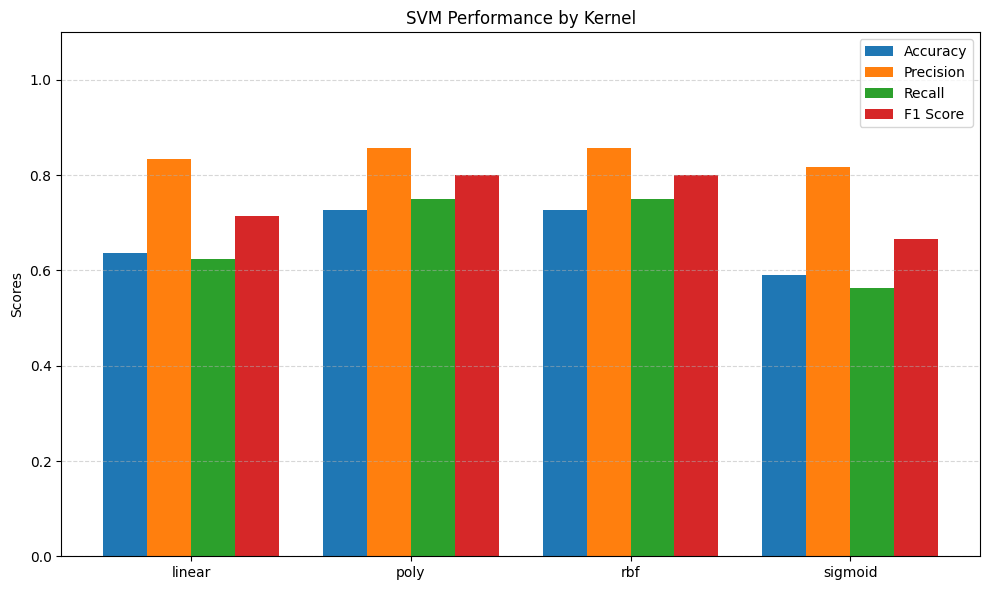

In [13]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVC
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

results = {
    'Kernel': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Train and evaluate each model
for kernel in kernels:
    print(f"\nSVM with '{kernel}' kernel")

    if kernel == 'poly':
        # GridSearch for polynomial kernel
        param_grid = {
            'degree': [2, 3, 4],
            'C': [0.1, 1, 10],
            'gamma': ['scale', 'auto']
        }
        grid = GridSearchCV(SVC(kernel='poly'), param_grid, cv=3, scoring='accuracy')
        grid.fit(data_X_train, data_Y_train)
        model = grid.best_estimator_
        print("Best poly parameters:", grid.best_params_)
    else:
        model = SVC(kernel=kernel)
        model.fit(data_X_train, data_Y_train)

    y_pred = model.predict(data_X_test)

    acc = accuracy_score(data_Y_test, y_pred)
    prec = precision_score(data_Y_test, y_pred)
    rec = recall_score(data_Y_test, y_pred)
    f1 = f1_score(data_Y_test, y_pred)
    cf=confusion_matrix(data_Y_test,y_pred)

    print(cf)

    results['Kernel'].append(kernel)
    results['Accuracy'].append(acc)
    results['Precision'].append(prec)
    results['Recall'].append(rec)
    results['F1 Score'].append(f1)


    print(f"Accuracy       : {acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")

# Bar Plot
x = np.arange(len(kernels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - 1.5*width, results['Accuracy'], width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, results['Precision'], width, label='Precision')
rects3 = ax.bar(x + 0.5*width, results['Recall'], width, label='Recall')
rects4 = ax.bar(x + 1.5*width, results['F1 Score'], width, label='F1 Score')

# Add labels and titles
ax.set_ylabel('Scores')
ax.set_title('SVM Performance by Kernel')
ax.set_xticks(x)
ax.set_xticklabels(results['Kernel'])
ax.set_ylim(0, 1.1)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


*svm using only output features*

In [14]:
data_Y
data_X=pd.DataFrame(data_original.iloc[:,2:-8])
data_X
data_X_train,data_X_test,data_Y_train,data_Y_test=train_test_split(data_X,data_Y,test_size=0.2,random_state=42)


SVM with 'linear' kernel
[[ 4  2]
 [ 2 14]]
Accuracy       : 0.8182
Precision      : 0.8750
Recall         : 0.8750
F1 Score       : 0.8750

SVM with 'poly' kernel
Best poly parameters: {'C': 0.1, 'degree': 2, 'gamma': 'auto'}
[[ 4  2]
 [ 1 15]]
Accuracy       : 0.8636
Precision      : 0.8824
Recall         : 0.9375
F1 Score       : 0.9091

SVM with 'rbf' kernel
[[ 4  2]
 [ 3 13]]
Accuracy       : 0.7727
Precision      : 0.8667
Recall         : 0.8125
F1 Score       : 0.8387

SVM with 'sigmoid' kernel
[[ 0  6]
 [ 1 15]]
Accuracy       : 0.6818
Precision      : 0.7143
Recall         : 0.9375
F1 Score       : 0.8108


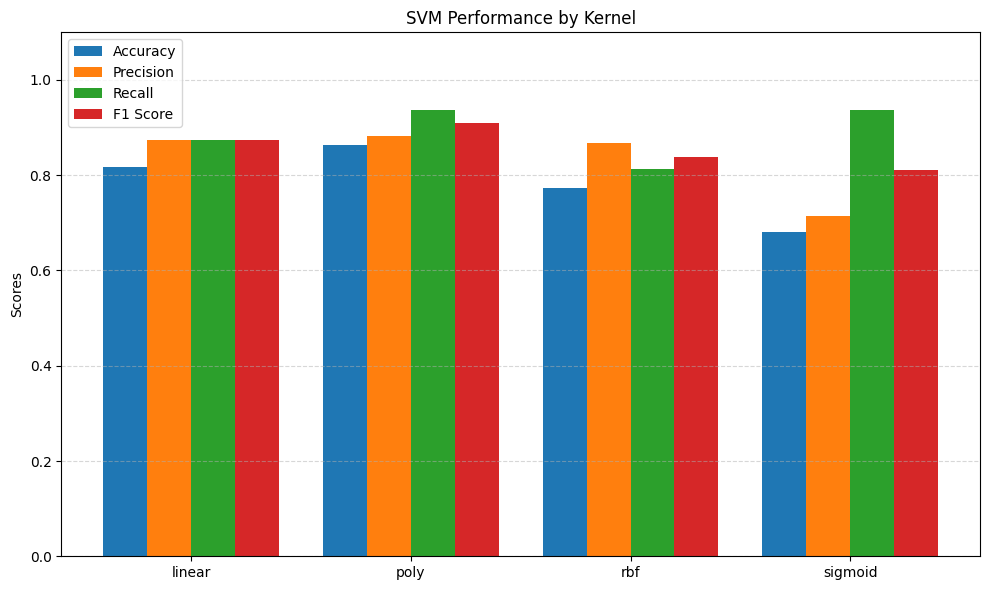

In [15]:

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

results = {
    'Kernel': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Train and evaluate each model
for kernel in kernels:
    print(f"\nSVM with '{kernel}' kernel")

    if kernel == 'poly':
        # GridSearch for polynomial kernel
        param_grid = {
            'degree': [2,],
            'C': [0.1,],
            'gamma': ['scale', 'auto']
        }
        grid = GridSearchCV(SVC(kernel='poly'), param_grid, cv=3, scoring='accuracy')
        grid.fit(data_X_train, data_Y_train)
        model = grid.best_estimator_
        print("Best poly parameters:", grid.best_params_)
    else:
        model = SVC(kernel=kernel)
        model.fit(data_X_train, data_Y_train)

    y_pred = model.predict(data_X_test)

    acc = accuracy_score(data_Y_test, y_pred)
    prec = precision_score(data_Y_test, y_pred)
    rec = recall_score(data_Y_test, y_pred)
    f1 = f1_score(data_Y_test, y_pred)
    cf=confusion_matrix(data_Y_test,y_pred)

    print(cf)

    results['Kernel'].append(kernel)
    results['Accuracy'].append(acc)
    results['Precision'].append(prec)
    results['Recall'].append(rec)
    results['F1 Score'].append(f1)


    print(f"Accuracy       : {acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")

# Bar Plot
x = np.arange(len(kernels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - 1.5*width, results['Accuracy'], width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, results['Precision'], width, label='Precision')
rects3 = ax.bar(x + 0.5*width, results['Recall'], width, label='Recall')
rects4 = ax.bar(x + 1.5*width, results['F1 Score'], width, label='F1 Score')

# Add labels and titles
ax.set_ylabel('Scores')
ax.set_title('SVM Performance by Kernel')
ax.set_xticks(x)
ax.set_xticklabels(results['Kernel'])
ax.set_ylim(0, 1.1)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


*svm using all the features*

In [ ]:
data_Y
data_X=pd.DataFrame(data_original.iloc[:,2:])
data_X
data_X_train,data_X_test,data_Y_train,data_Y_test=train_test_split(data_X,data_Y,test_size=0.2,random_state=42)
data_X_train

In [ ]:

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

results = {
    'Kernel': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Train and evaluate each model
for kernel in kernels:
    print(f"\nSVM with '{kernel}' kernel")

    if kernel == 'poly':
        # GridSearch for polynomial kernel
        param_grid = {
            'degree': [2,],
            'C': [0.1,],
            'gamma': ['scale', 'auto']
        }
        grid = GridSearchCV(SVC(kernel='poly'), param_grid, cv=3, scoring='accuracy')
        grid.fit(data_X_train, data_Y_train)
        model = grid.best_estimator_
        print("Best poly parameters:", grid.best_params_)
    else:
        model = SVC(kernel=kernel)
        model.fit(data_X_train, data_Y_train)

    y_pred = model.predict(data_X_test)

    acc = accuracy_score(data_Y_test, y_pred)
    prec = precision_score(data_Y_test, y_pred)
    rec = recall_score(data_Y_test, y_pred)
    f1 = f1_score(data_Y_test, y_pred)
    cf=confusion_matrix(data_Y_test,y_pred)

    print(cf)

    results['Kernel'].append(kernel)
    results['Accuracy'].append(acc)
    results['Precision'].append(prec)
    results['Recall'].append(rec)
    results['F1 Score'].append(f1)


    print(f"Accuracy       : {acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")

# Bar Plot
x = np.arange(len(kernels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - 1.5*width, results['Accuracy'], width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, results['Precision'], width, label='Precision')
rects3 = ax.bar(x + 0.5*width, results['Recall'], width, label='Recall')
rects4 = ax.bar(x + 1.5*width, results['F1 Score'], width, label='F1 Score')

# Add labels and titles
ax.set_ylabel('Scores')
ax.set_title('SVM Performance by Kernel')
ax.set_xticks(x)
ax.set_xticklabels(results['Kernel'])
ax.set_ylim(0, 1.1)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


**SVM on kmeans(2)**

*svm on input parameters*

In [21]:
data_Y=pd.read_csv("2_clusters_only_on_output.csv")
data_Y=pd.DataFrame(data_Y['Cluster'])
data_X=pd.DataFrame(data_original.iloc[:,-8:])
data_Y
data_X_train,data_X_test,data_Y_train,data_Y_test=train_test_split(data_X,data_Y,test_size=0.2,random_state=42)

,Cluster
0,1
1,1
2,1
3,0
4,1
...,...
103,0
104,0
105,1
106,1


In [ ]:

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

results = {
    'Kernel': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Train and evaluate each model
for kernel in kernels:
    print(f"\nSVM with '{kernel}' kernel")

    if kernel == 'poly':
        # GridSearch for polynomial kernel
        param_grid = {
            'degree': [2, 3, 4],
            'C': [0.1, 1, 10],
            'gamma': ['scale', 'auto']
        }
        grid = GridSearchCV(SVC(kernel='poly'), param_grid, cv=3, scoring='accuracy')
        grid.fit(data_X_train, data_Y_train)
        model = grid.best_estimator_
        print("Best poly parameters:", grid.best_params_)
    else:
        model = SVC(kernel=kernel)
        model.fit(data_X_train, data_Y_train)

    y_pred = model.predict(data_X_test)

    acc = accuracy_score(data_Y_test, y_pred)
    prec = precision_score(data_Y_test, y_pred)
    rec = recall_score(data_Y_test, y_pred)
    f1 = f1_score(data_Y_test, y_pred)
    cf=confusion_matrix(data_Y_test,y_pred)

    print(cf)

    results['Kernel'].append(kernel)
    results['Accuracy'].append(acc)
    results['Precision'].append(prec)
    results['Recall'].append(rec)
    results['F1 Score'].append(f1)


    print(f"Accuracy       : {acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")

# Bar Plot
x = np.arange(len(kernels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - 1.5*width, results['Accuracy'], width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, results['Precision'], width, label='Precision')
rects3 = ax.bar(x + 0.5*width, results['Recall'], width, label='Recall')
rects4 = ax.bar(x + 1.5*width, results['F1 Score'], width, label='F1 Score')

# Add labels and titles
ax.set_ylabel('Scores')
ax.set_title('SVM Performance by Kernel')
ax.set_xticks(x)
ax.set_xticklabels(results['Kernel'])
ax.set_ylim(0, 1.1)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()



SVM with 'linear' kernel
[[ 4  2]
 [ 2 14]]
Accuracy       : 0.8182
Precision      : 0.8750
Recall         : 0.8750
F1 Score       : 0.8750

SVM with 'poly' kernel


*svm on output parameters*

In [ ]:
data_X=pd.DataFrame(data_original.iloc[:,2:-8])
data_Y
data_X_train,data_X_test,data_Y_train,data_Y_test=train_test_split(data_X,data_Y,test_size=0.2,random_state=42)

In [ ]:

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

results = {
    'Kernel': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Train and evaluate each model
for kernel in kernels:
    print(f"\nSVM with '{kernel}' kernel")

    if kernel == 'poly':
        # GridSearch for polynomial kernel
        param_grid = {
            'degree': [2,],
            'C': [0.1,],
            'gamma': ['scale', 'auto']
        }
        grid = GridSearchCV(SVC(kernel='poly'), param_grid, cv=3, scoring='accuracy')
        grid.fit(data_X_train, data_Y_train)
        model = grid.best_estimator_
        print("Best poly parameters:", grid.best_params_)
    else:
        model = SVC(kernel=kernel)
        model.fit(data_X_train, data_Y_train)

    y_pred = model.predict(data_X_test)

    acc = accuracy_score(data_Y_test, y_pred)
    prec = precision_score(data_Y_test, y_pred)
    rec = recall_score(data_Y_test, y_pred)
    f1 = f1_score(data_Y_test, y_pred)
    cf=confusion_matrix(data_Y_test,y_pred)

    print(cf)

    results['Kernel'].append(kernel)
    results['Accuracy'].append(acc)
    results['Precision'].append(prec)
    results['Recall'].append(rec)
    results['F1 Score'].append(f1)


    print(f"Accuracy       : {acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")

# Bar Plot
x = np.arange(len(kernels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - 1.5*width, results['Accuracy'], width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, results['Precision'], width, label='Precision')
rects3 = ax.bar(x + 0.5*width, results['Recall'], width, label='Recall')
rects4 = ax.bar(x + 1.5*width, results['F1 Score'], width, label='F1 Score')

# Add labels and titles
ax.set_ylabel('Scores')
ax.set_title('SVM Performance by Kernel')
ax.set_xticks(x)
ax.set_xticklabels(results['Kernel'])
ax.set_ylim(0, 1.1)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


*svm on all parameters*

In [ ]:
data_X=pd.DataFrame(data_original.iloc[:,2:])
data_Y
data_X_train,data_X_test,data_Y_train,data_Y_test=train_test_split(data_X,data_Y,test_size=0.2,random_state=42)

In [ ]:

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

results = {
    'Kernel': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Train and evaluate each model
for kernel in kernels:
    print(f"\nSVM with '{kernel}' kernel")

    if kernel == 'poly':
        # GridSearch for polynomial kernel
        param_grid = {
            'degree': [2,],
            'C': [0.1,],
            'gamma': ['scale', 'auto']
        }
        grid = GridSearchCV(SVC(kernel='poly'), param_grid, cv=3, scoring='accuracy')
        grid.fit(data_X_train, data_Y_train)
        model = grid.best_estimator_
        print("Best poly parameters:", grid.best_params_)
    else:
        model = SVC(kernel=kernel)
        model.fit(data_X_train, data_Y_train)

    y_pred = model.predict(data_X_test)

    acc = accuracy_score(data_Y_test, y_pred)
    prec = precision_score(data_Y_test, y_pred)
    rec = recall_score(data_Y_test, y_pred)
    f1 = f1_score(data_Y_test, y_pred)
    cf=confusion_matrix(data_Y_test,y_pred)

    print(cf)

    results['Kernel'].append(kernel)
    results['Accuracy'].append(acc)
    results['Precision'].append(prec)
    results['Recall'].append(rec)
    results['F1 Score'].append(f1)


    print(f"Accuracy       : {acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")

# Bar Plot
x = np.arange(len(kernels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - 1.5*width, results['Accuracy'], width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, results['Precision'], width, label='Precision')
rects3 = ax.bar(x + 0.5*width, results['Recall'], width, label='Recall')
rects4 = ax.bar(x + 1.5*width, results['F1 Score'], width, label='F1 Score')

# Add labels and titles
ax.set_ylabel('Scores')
ax.set_title('SVM Performance by Kernel')
ax.set_xticks(x)
ax.set_xticklabels(results['Kernel'])
ax.set_ylim(0, 1.1)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()
